In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
data=pd.read_csv('/kaggle/input/newrecipe/recipes.csv')

In [11]:
data.head()

,yemekAdi,yapilis,yeşil biber,ceviz içi,bulgur,kuru maya,kaşar peyniri,yaş maya,kutu ton balığı,esmer şeker,...,spagetti,sucuk,dövülmüş fındık,pide ekmeği,tavuk but,doğranmış havuç,salça,tavuk budu,karnıbahar,dana biftek
0,Kuru Fasulye,Kuru fasulyeyi bir gece önceden ıslatın. Ertes...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,İçli Köfte,"Bulguru ve irmiği sıcak suyla ıslatıp yoğurun,...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lahmacun,"Hamur için unu maya ve suyla yoğurun, dinlendi...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Mantı,"Hamuru un, yumurta ve suyla yoğurup dinlendiri...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Zeytinyağlı Yaprak Sarma,Pirinci yıkayıp süzün. Soğanı zeytinyağında ka...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
data.tail()

,yemekAdi,yapilis,yeşil biber,ceviz içi,bulgur,kuru maya,kaşar peyniri,yaş maya,kutu ton balığı,esmer şeker,...,spagetti,sucuk,dövülmüş fındık,pide ekmeği,tavuk but,doğranmış havuç,salça,tavuk budu,karnıbahar,dana biftek
224,Kabaklı Mantar Çorbası,"Soğanı soteleyin, doğranmış kabak ve mantarlar...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,Beyaz Peynirli Patates Kızartması,Patatesleri doğrayıp kızartın. Üzerine beyaz p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,Meyveli Yoğurtlu Kahvaltı,Yoğurdu bir kaseye alıp üzerine doğranmış muz ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,Avokadolu Kahvaltı Tostu,Ekmek dilimlerini kızartın. Avokadoyu ezip üze...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,Kremalı Peynirli Çörek,Hamuru yoğurup şekil verin ve içine krem peyni...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data = data.loc[:, ~(data == 0).all()]

In [14]:
data.head()

,yemekAdi,yapilis,yeşil biber,ceviz içi,bulgur,kuru maya,kaşar peyniri,yaş maya,kutu ton balığı,esmer şeker,...,spagetti,sucuk,dövülmüş fındık,pide ekmeği,tavuk but,doğranmış havuç,salça,tavuk budu,karnıbahar,dana biftek
0,Kuru Fasulye,Kuru fasulyeyi bir gece önceden ıslatın. Ertes...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,İçli Köfte,"Bulguru ve irmiği sıcak suyla ıslatıp yoğurun,...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lahmacun,"Hamur için unu maya ve suyla yoğurun, dinlendi...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Mantı,"Hamuru un, yumurta ve suyla yoğurup dinlendiri...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Zeytinyağlı Yaprak Sarma,Pirinci yıkayıp süzün. Soğanı zeytinyağında ka...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Fold 1/3
Fold 1 - Ortalama Mesafe: 0.3792

Fold 2/3
Fold 2 - Ortalama Mesafe: 0.3882

Fold 3/3
Fold 3 - Ortalama Mesafe: 0.3699

3-Fold Çapraz Doğrulama Ortalama Mesafe: 0.3791
Son model başarıyla eğitildi ve kaydedildi.


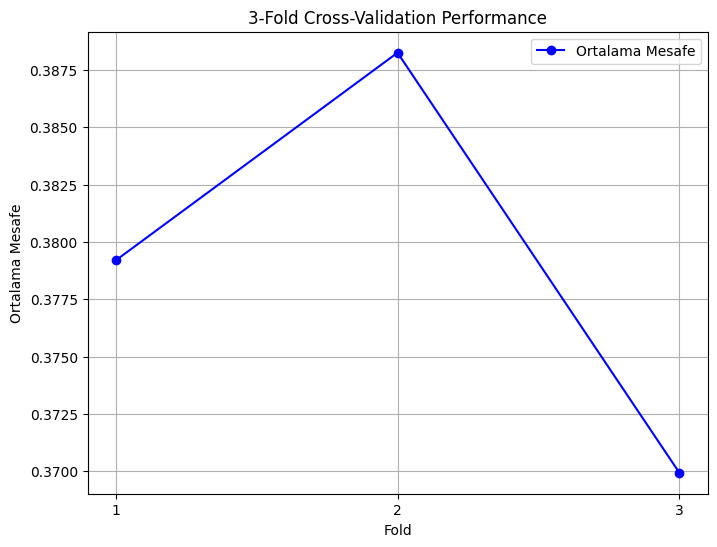

In [71]:
import pandas as pd
import pickle
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def cross_validate_model(X, k=3, model_path="knn_model.pkl"):
    """k-Fold Cross-Validation ile modeli eğit ve değerlendir."""
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_scores = []

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {fold + 1}/{k}")

        # Eğitim ve test setlerini ayır
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]

        # Modeli oluştur ve eğit
        knn = NearestNeighbors(n_neighbors=3, metric='cosine')
        knn.fit(X_train.values)

        # Test setindeki performansı değerlendir
        distances, _ = knn.kneighbors(X_test.values)

        # Ortalama mesafe üzerinden performansı hesapla
        avg_distance = distances.mean()
        fold_scores.append(avg_distance)
        print(f"Fold {fold + 1} - Ortalama Mesafe: {avg_distance:.4f}\n")

    # Ortalama performansı yazdır
    print(f"{k}-Fold Çapraz Doğrulama Ortalama Mesafe: {sum(fold_scores) / len(fold_scores):.4f}")

    # Son modeli kaydet
    knn.fit(X.values)
    with open(model_path, 'wb') as model_file:
        pickle.dump(knn, model_file)
        print("Son model başarıyla eğitildi ve kaydedildi.")

    # Grafik oluştur
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, k+1), fold_scores, marker='o', linestyle='-', color='b', label='Ortalama Mesafe')
    plt.title(f'{k}-Fold Cross-Validation Performance')
    plt.xlabel('Fold')
    plt.ylabel('Ortalama Mesafe')
    plt.xticks(range(1, k+1))
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Veriyi yükle
    file_path = "/kaggle/input/newrecipe/recipes.csv"
    data = pd.read_csv(file_path)

    # Hedef sütunları çıkar (yemekAdi, yapilis)
    X = data.drop(columns=['yemekAdi', 'yapilis'])

    # Modeli çapraz doğrulama ile eğit ve değerlendir
    cross_validate_model(X)


Model başarıyla yüklendi.


Kullandığınız malzemeleri virgülle ayırarak girin (örnek: muz,patlıcan):  tuz,karabiber,patlıcan


Vermiş olduğunuz malzemelere uygun yemek tariflerini aşağıda verdim. Afiyet olsun :)
1. Patlıcanlı Musakka (Benzerlik: 65%)
   Malzemeler: patlıcan, soğan, kıyma, tuz, zeytinyağı, karabiber, salça
   Yapılışı: Patlıcanları kızartın. Soğan ve kıymayı zeytinyağında kavurun, salça ve baharatları ekleyin. Kat kat dizip fırında 30 dakika pişirin.

2. Şakşuka (Benzerlik: 57%)
   Malzemeler: yeşil biber, domates, patlıcan, tuz
   Yapılışı: Patlıcanları küp küp doğrayıp kızartın, domates ve biberi ekleyip pişirin.

3. Karnıyarık (Benzerlik: 57%)
   Malzemeler: yeşil biber, domates, patlıcan, sıvı yağ, kıyma, tuz, karabiber, kuru soğan, salça
   Yapılışı: Patlıcanları alacalı soyup ortalarını yararak kızartın. Kuru soğanı ve yeşil biberleri küçük doğrayıp sıvı yağda kavurun, üzerine kıymayı ekleyip kavurmaya devam edin. Salça, domates, tuz ve karabiber ekleyerek iç harcı hazırlayın. Kızarmış patlıcanların içine bu harcı doldurun. Tencereye dizip üzerine bir miktar su ekleyerek kısık ateşte pişi

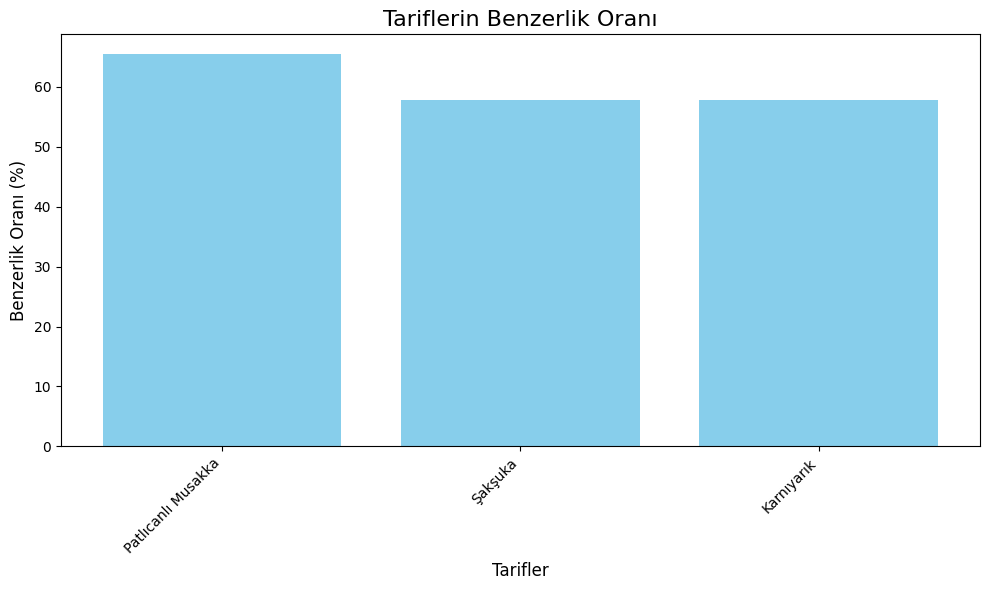

Kullanıcıdan alınan malzemeler:
tuz, karabiber, patlıcan


In [68]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

def load_model(model_path="knn_model.pkl"):
    try:
        with open(model_path, 'rb') as model_file:
            knn = pickle.load(model_file)
            print("Model başarıyla yüklendi.")
    except FileNotFoundError:
        print("Model dosyası bulunamadı. Lütfen modeli eğitin.")
        exit()
    return knn

def create_user_vector(X, kullanici_malzemeleri):
    return np.array([[1 if malzeme in kullanici_malzemeleri else 0 for malzeme in X.columns]])

def predict_recipes(knn, X, y, kullanici_vektoru, data, kullanici_malzemeleri):
    mesafeler, indeksler = knn.kneighbors(kullanici_vektoru)
    benzerlik_oranlari = []
    tarif_isimleri = []

    print("Vermiş olduğunuz malzemelere uygun yemek tariflerini aşağıda verdim. Afiyet olsun :)")
    
    for i, indeks in enumerate(indeksler[0]):
        benzerlik = 1 - mesafeler[0][i]  # Benzerlik oranını hesapla
        tarif_adi = y.iloc[indeks]
        tarif_isimleri.append(tarif_adi)
        benzerlik_oranlari.append(benzerlik * 100)  # Yüzde olarak kaydet

        print(f"{i+1}. {tarif_adi} (Benzerlik: {int(benzerlik * 100)}%)")
        print(f"   Malzemeler: {', '.join(X.columns[X.iloc[indeks] == 1].tolist())}")
        print(f"   Yapılışı: {data.iloc[indeks]['yapilis']}\n")

    # Benzerlik oranlarına göre bir grafik oluştur
    plot_similarity_graph(tarif_isimleri, benzerlik_oranlari)
    
    # Kullanıcıdan alınan malzemeleri en son yazdır
    print("Kullanıcıdan alınan malzemeler:")
    print(", ".join(kullanici_malzemeleri))

def plot_similarity_graph(tarif_isimleri, benzerlik_oranlari):
    # Bar grafiği oluşturma
    plt.figure(figsize=(10, 6))
    plt.bar(tarif_isimleri, benzerlik_oranlari, color='skyblue')

    # Başlık ve etiketler
    plt.title('Tariflerin Benzerlik Oranı', fontsize=16)
    plt.xlabel('Tarifler', fontsize=12)
    plt.ylabel('Benzerlik Oranı (%)', fontsize=12)

    # Grafiği göster
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

def main():
    file_path = "/kaggle/input/newrecipe/recipes.csv"
    data = pd.read_csv(file_path)

    y = data['yemekAdi']
    X = data.drop(columns=['yemekAdi', 'yapilis'])

    knn = load_model()

    kullanici_girisi = input("Kullandığınız malzemeleri virgülle ayırarak girin (örnek: muz,patlıcan): ")
    kullanici_malzemeleri = [malzeme.strip() for malzeme in kullanici_girisi.split(',')]

    kullanici_vektoru = create_user_vector(X, kullanici_malzemeleri)

    predict_recipes(knn, X, y, kullanici_vektoru, data, kullanici_malzemeleri)

if __name__ == "__main__":
    main()
